In [2]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

# Download the MNIST Dataset
dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=tensor_transform)

# DataLoader is used to load the dataset for training
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

In [4]:
# Creating a PyTorch class
# 28*28 ==> 8 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 8
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 8),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 8 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(8, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [5]:
# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-8)

In [6]:
epochs = 10
outputs = []
losses = []
for epoch in range(epochs):
    print("Epoch: ", epoch)
    for image, _ in loader:

        # Reshaping the image to (-1, 784)
        image = image.reshape(-1, 28 * 28)

        # Output of Autoencoder
        reconstructed = model(image)

        # Calculating the loss function
        loss = loss_function(reconstructed, image)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(loss.item())
    outputs.append((epochs, image, reconstructed))
    print("Loss", loss.item())

Epoch:  0
Loss 0.03520055115222931
Epoch:  1
Loss 0.022929256781935692
Epoch:  2
Loss 0.025406327098608017
Epoch:  3
Loss 0.023482976481318474
Epoch:  4
Loss 0.02493421733379364
Epoch:  5
Loss 0.01984398253262043
Epoch:  6
Loss 0.01833408512175083
Epoch:  7
Loss 0.02265438251197338
Epoch:  8
Loss 0.01957336813211441
Epoch:  9
Loss 0.019272582605481148


In [7]:
# Defining the Plot Style
plt.style.use("fivethirtyeight")
plt.xlabel("Iterations")
plt.ylabel("Loss")

# Plotting the last 100 values
plt.plot(losses[-100:])

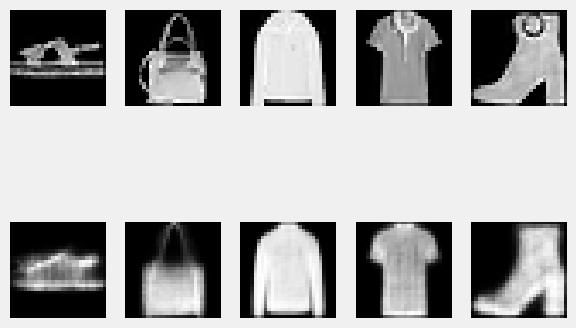

In [8]:
example = image[:5].cpu().detach().numpy()
reconstructed_example = reconstructed[:5].cpu().detach().numpy()

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(example[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed_example[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()